In [1]:
import streamlit as st

2022-09-01 16:57:57.413 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [13]:
data = pd.read_csv("C:/Users/thoma/Desktop/final project/turnover/turnover.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [4]:
data.gender.value_counts()

f    853
m    276
Name: gender, dtype: int64

In [8]:
data.greywage.value_counts()

white    1002
grey      127
Name: greywage, dtype: int64

In [14]:
data.drop(columns=['gender','head_gender','age','way'],inplace=True)

In [15]:
#data["gender"] = data["gender"].astype("category")
data["profession"] = data["profession"].astype("category")
data["traffic"] = data["traffic"].astype("category")
data["coach"] = data["coach"].astype("category")
#data["head_gender"] = data["head_gender"].astype("category")
data["greywage"] = data["greywage"].astype("category")
#data["way"] = data["way"].astype("category")
data["industry"] = data["industry"].astype("category")

In [16]:
from sksurv.preprocessing import OneHotEncoder
data_cat = OneHotEncoder().fit_transform(data)
data_cat.head()

,stag,event,industry=Agriculture,industry=Banks,industry=Building,industry=Consult,industry=IT,industry=Mining,industry=Pharma,industry=PowerGeneration,...,traffic=referal,traffic=youjs,coach=no,coach=yes,greywage=white,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,3.0,4.1,8.0,7.1,3.7


In [17]:
X = data_cat

y = X.pop("event")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123456)

In [19]:
clf = LogisticRegression(penalty='none',max_iter=2000) # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(max_iter=2000, penalty='none')

c:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


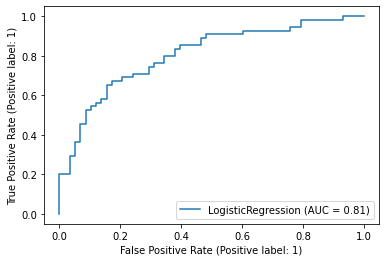

In [20]:
plot_roc_curve(clf, X_test, y_test)

c:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


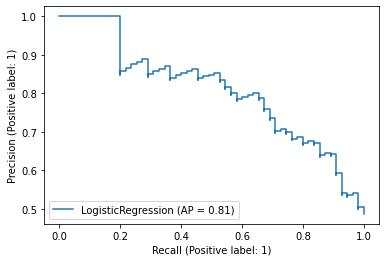

In [21]:
plot_precision_recall_curve(clf, X_test, y_test)

In [22]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [23]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
#print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.56248
AUC = 0.80533
Average Precision = 0.80899
Accuracy = 0.75221
Precision = 0.78723
Recall = 0.67273
F1 score = 0.72549

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        58
           1       0.79      0.67      0.73        55

    accuracy                           0.75       113
   macro avg       0.76      0.75      0.75       113
weighted avg       0.76      0.75      0.75       113



Confusion Matrix


c:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


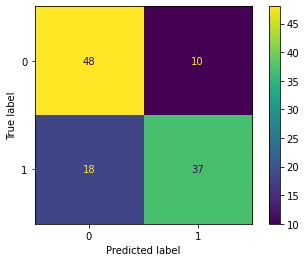

In [24]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[48, 10],
       [18, 37]], dtype=int64)